In [ ]:
%load_ext autoreload
%autoreload 2

# MTBO Demo

In [1]:
from summit.strategies import MTBO, Random
from summit.benchmarks import Himmelblau, Hartmann3D
from summit.utils.dataset import DataSet
from summit import Runner
import summit
import pathlib
import pandas as pd
import numpy as np

## Benchmarks

We create the himmelblau and a modified version that is shifted up and scaled.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

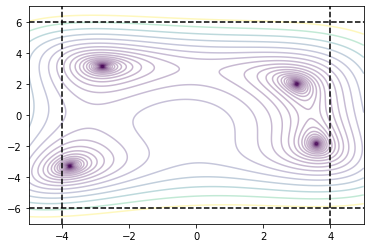

In [2]:
exp = Himmelblau()
exp.plot()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

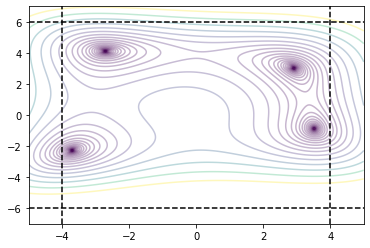

In [3]:
exp_modified = Himmelblau()
# Shift and scale function
exp_modified.equation = "1.5*((x_1**2 + x_2 - 11.5)**2+(x_1 + (x_2-1)**2 -7)**2)"
exp_modified.plot()

## Create pretraining data

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

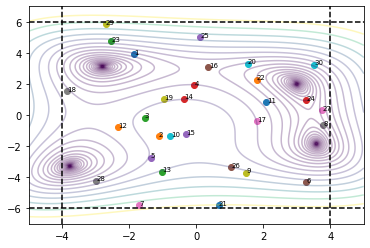

In [4]:
exp.reset()
random = Random(exp.domain)
conditions = random.suggest_experiments(30)
results = exp.run_experiments(conditions)
exp.plot()

In [5]:
pt_data = exp.data
pt_data[('task', 'METADATA')] = 0
pt_data.head(5)

,x_1,x_2,y,computation_t,experiment_t,strategy,task
0,-1.874976,3.931960,55.986887,0.0,0.030323,Random,0
1,-1.125575,-1.367462,162.354865,0.0,0.005585,Random,0
2,-1.548258,-0.158104,149.401114,0.0,0.003688,Random,0
3,-0.067403,1.938983,92.960899,0.0,0.003513,Random,0
4,-1.367722,-2.731495,141.501351,0.0,0.003402,Random,0


## Multitask optimization on modified Himmelblau

In [6]:
exp.domain

Name,Type,Description,Values
x_1,"continuous, input",Input 1,"[-4,4]"
x_2,"continuous, input",Input 2,"[-6,6]"
y,"continuous, minimize objective",Function value,"[-1000,0]"


In [7]:
exp_modified.reset()
strategy = MTBO(exp_modified.domain, pretraining_data = pt_data, task=1)
r = Runner(strategy=strategy, experiment=exp_modified, max_iterations=10)
r.run()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

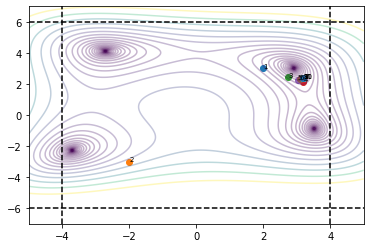

In [8]:
exp_modified.plot()

In [32]:
def calculate_best_y(n_pretraining):
    #Generate pretraining data
    exp.reset()
    random = Random(exp.domain)
    conditions = random.suggest_experiments(n_pretraining)
    results = exp.run_experiments(conditions)

    #Run optimization
    exp_modified.reset()
    strategy = MTBO(exp_modified.domain, pretraining_data = pt_data, task=1)
    r = Runner(strategy=strategy, experiment=exp_modified, max_iterations=30)
    r.run()
    
    return exp_modified.data['y'].min(), exp_modified

In [ ]:
n_repeats = 20
n_pretraining = [1, 10, 100]
results = [[calculate_best_y(n) for _ in range(n_repeats)] for n in n_pretraining]

In [35]:
y_values = [[r[0] for r in n] for n in results]
y_values = np.array(y_values)
np.mean(y_values, axis=1)

array([1.61707255, 0.17792093, 0.2641526 ])